<a href="https://colab.research.google.com/github/RSeth-Creator/Data/blob/dataScience/MultiClass_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [4]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [13]:
data_path="/content/gdrive/MyDrive/Semester_III/DeepLearning/IRIS.csv"


In [18]:
data = pd.read_csv(data_path,header=None)
data.head()


,0,1,2,3,4,5,6,7,8
0,5.1,0.222222,3.5,0.625000,1.4,0.067797,0.2,0.041667,setosa
1,4.9,0.166667,3.0,0.416667,1.4,0.067797,0.2,0.041667,setosa
2,4.7,0.111111,3.2,0.500000,1.3,0.050847,0.2,0.041667,setosa
3,4.6,0.083333,3.1,0.458333,1.5,0.084746,0.2,0.041667,setosa
4,5.0,0.194444,3.6,0.666667,1.4,0.067797,0.2,0.041667,setosa


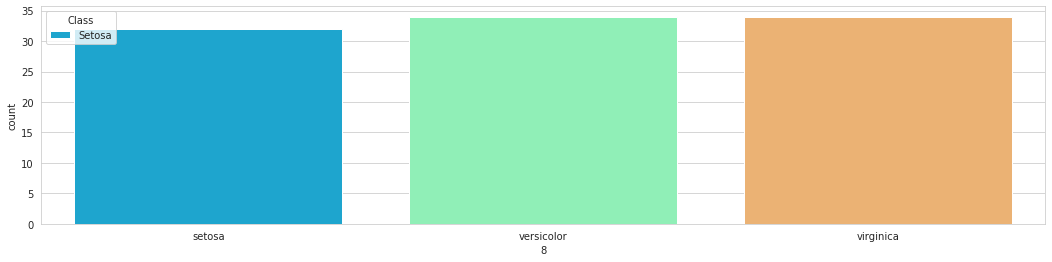

In [19]:

sns.set_style('whitegrid')
plt.figure(figsize=(18, 4))
sns.countplot(x=8,data=data,palette='rainbow')
plt.legend(title='Class', loc='upper left')


In [ ]:
#Accuracy checking for models  
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB 
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
#Create a list with required model name 
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
    DecisionTreeClassifier(),
    KNeighborsClassifier(3)
]

features =  data.iloc[: , :7]
labels = data[[8]]
#Assing the level of cross validation to find the best accuracy
CV = 5  #cross validation number here it os 5 
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

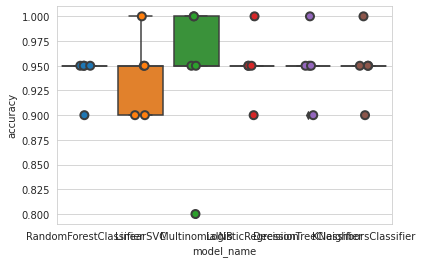

In [21]:
#Showing which model giving the best accuracy
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [22]:
#finding out the accuracy mean for all the classification model 
cv_df.groupby('model_name').accuracy.mean()

model_name
DecisionTreeClassifier    0.95
KNeighborsClassifier      0.95
LinearSVC                 0.94
LogisticRegression        0.95
MultinomialNB             0.94
RandomForestClassifier    0.94
Name: accuracy, dtype: float64

In [23]:
#Applying KNN to the dataset as it has the highest accuracy
model_KNN = KNeighborsClassifier()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, data.index, test_size=0.33, random_state=0)
model_KNN.fit(X_train, y_train)
y_pred = model_KNN.predict(X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


In [24]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[11,  0,  0],
       [ 0,  9,  0],
       [ 0,  3, 10]])

In [25]:
from sklearn.metrics import classification_report, accuracy_score
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9090909090909091
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       0.75      1.00      0.86         9
   virginica       1.00      0.77      0.87        13

    accuracy                           0.91        33
   macro avg       0.92      0.92      0.91        33
weighted avg       0.93      0.91      0.91        33



In [30]:
#Applying Decesion tree to the dataset as it has the highest accuracy
model_DT = DecisionTreeClassifier()
X_train1, X_test1, y_train1, y_test1, indices_train, indices_test = train_test_split(features, labels, data.index, test_size=0.33, random_state=0)
model_DT.fit(X_train1, y_train1)
y_pred1 = model_DT.predict(X_test1)

In [31]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test1, y_pred1)
conf_mat

array([[11,  0,  0],
       [ 0,  9,  0],
       [ 0,  3, 10]])

In [32]:
from sklearn.metrics import classification_report, accuracy_score
print(accuracy_score(y_test1, y_pred1))
print(classification_report(y_test1, y_pred1))

0.9090909090909091
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       0.75      1.00      0.86         9
   virginica       1.00      0.77      0.87        13

    accuracy                           0.91        33
   macro avg       0.92      0.92      0.91        33
weighted avg       0.93      0.91      0.91        33

